参考: 
- https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
- https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 使用 3d 图必须要先 import Axes3D

%matplotlib notebook
# viewing figures interactively rather than statically in the notebook

## VNet loss-weights map

In [52]:
def vis_loss_weight_map(curve_data_path, step=1):
    curves_data = np.load(curve_data_path).squeeze()  # (100, 2, 100)

    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.set_xlabel('loss')
    # ax.set_ylabel('epoch')
    ax.set_yticks([])
    ax.set_zlabel('weight')
    # ax.set_title('mw_cifar10_imb100')
    ax.view_init(0, -90)  # vertical,horizontal

    for i in range(len(curves_data)):
        if i % step == 0:
            x = curves_data[i][0]
            z = curves_data[i][1]
            y = np.array([i] * len(x))
            ax.plot3D(x, y, z)
            ax.text(x[99], y[99], z[99], f'{i+1}', 
                    color='black', 
                    fontdict={
#                         'fontweight': 'bold',
                        'size': 9
                    })

<IPython.core.display.Javascript object>


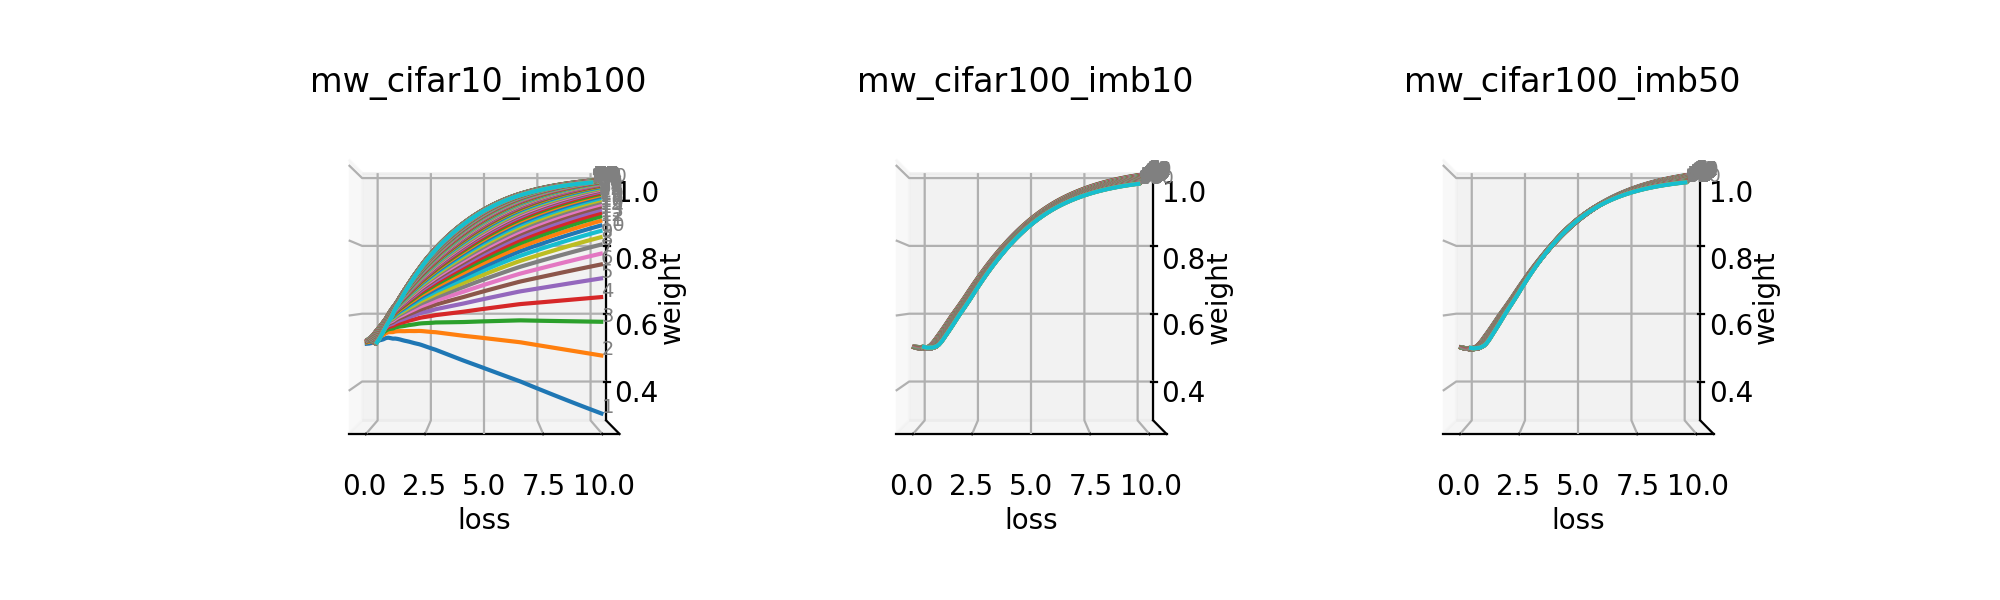

In [45]:
import os

curves_dir = 'npy'
# curves = os.listdir(curves_dir)
curves = [  # 自定义顺序
    'mw_cifar10_imb100_curves_data.npy',
    'mw_cifar100_imb10_curves_data.npy',
    'mw_cifar100_imb50_curves_data.npy'
]
curves_num = len(curves)

cols = 3  # 每行作图个数
rows = curves_num // cols + 1 if curves_num % cols > 0 else curves_num // cols

f, axs = plt.subplots(nrows=rows, ncols=cols,
                      # sharex=True,
                      subplot_kw=dict(projection='3d'))  # 指定子图为3D
f.set_size_inches((10, rows * 3))  # w,h

for idx, cur in enumerate(curves):
    curve_path = os.path.join(curves_dir, cur)
    curves_data = np.load(curve_path).squeeze()  # (100, 2, 100)

    ax = axs.flat[idx]

    if idx < curves_num:
        ax.set_xlabel('loss')
#         ax.set_ylabel('epoch')
        ax.set_yticks([])
        ax.set_zlabel('weight')
        ax.set_zlim(0.3,1)
        ax.set_title(cur.replace('_curves_data.npy', ''))  # 去掉后缀
        ax.view_init(0, -90)

        step = 1

        for i in range(len(curves_data)):
            if i % step == 0:
                x = curves_data[i][0]
                z = curves_data[i][1]
                y = np.array([i] * len(x))
                ax.plot3D(x, y, z)
                ax.text(x[99], y[99], z[99], f'{i + 1}', color='gray', fontdict={'size': 7})
    else:
        ax.clean()
        
plt.show()

<IPython.core.display.Javascript object>


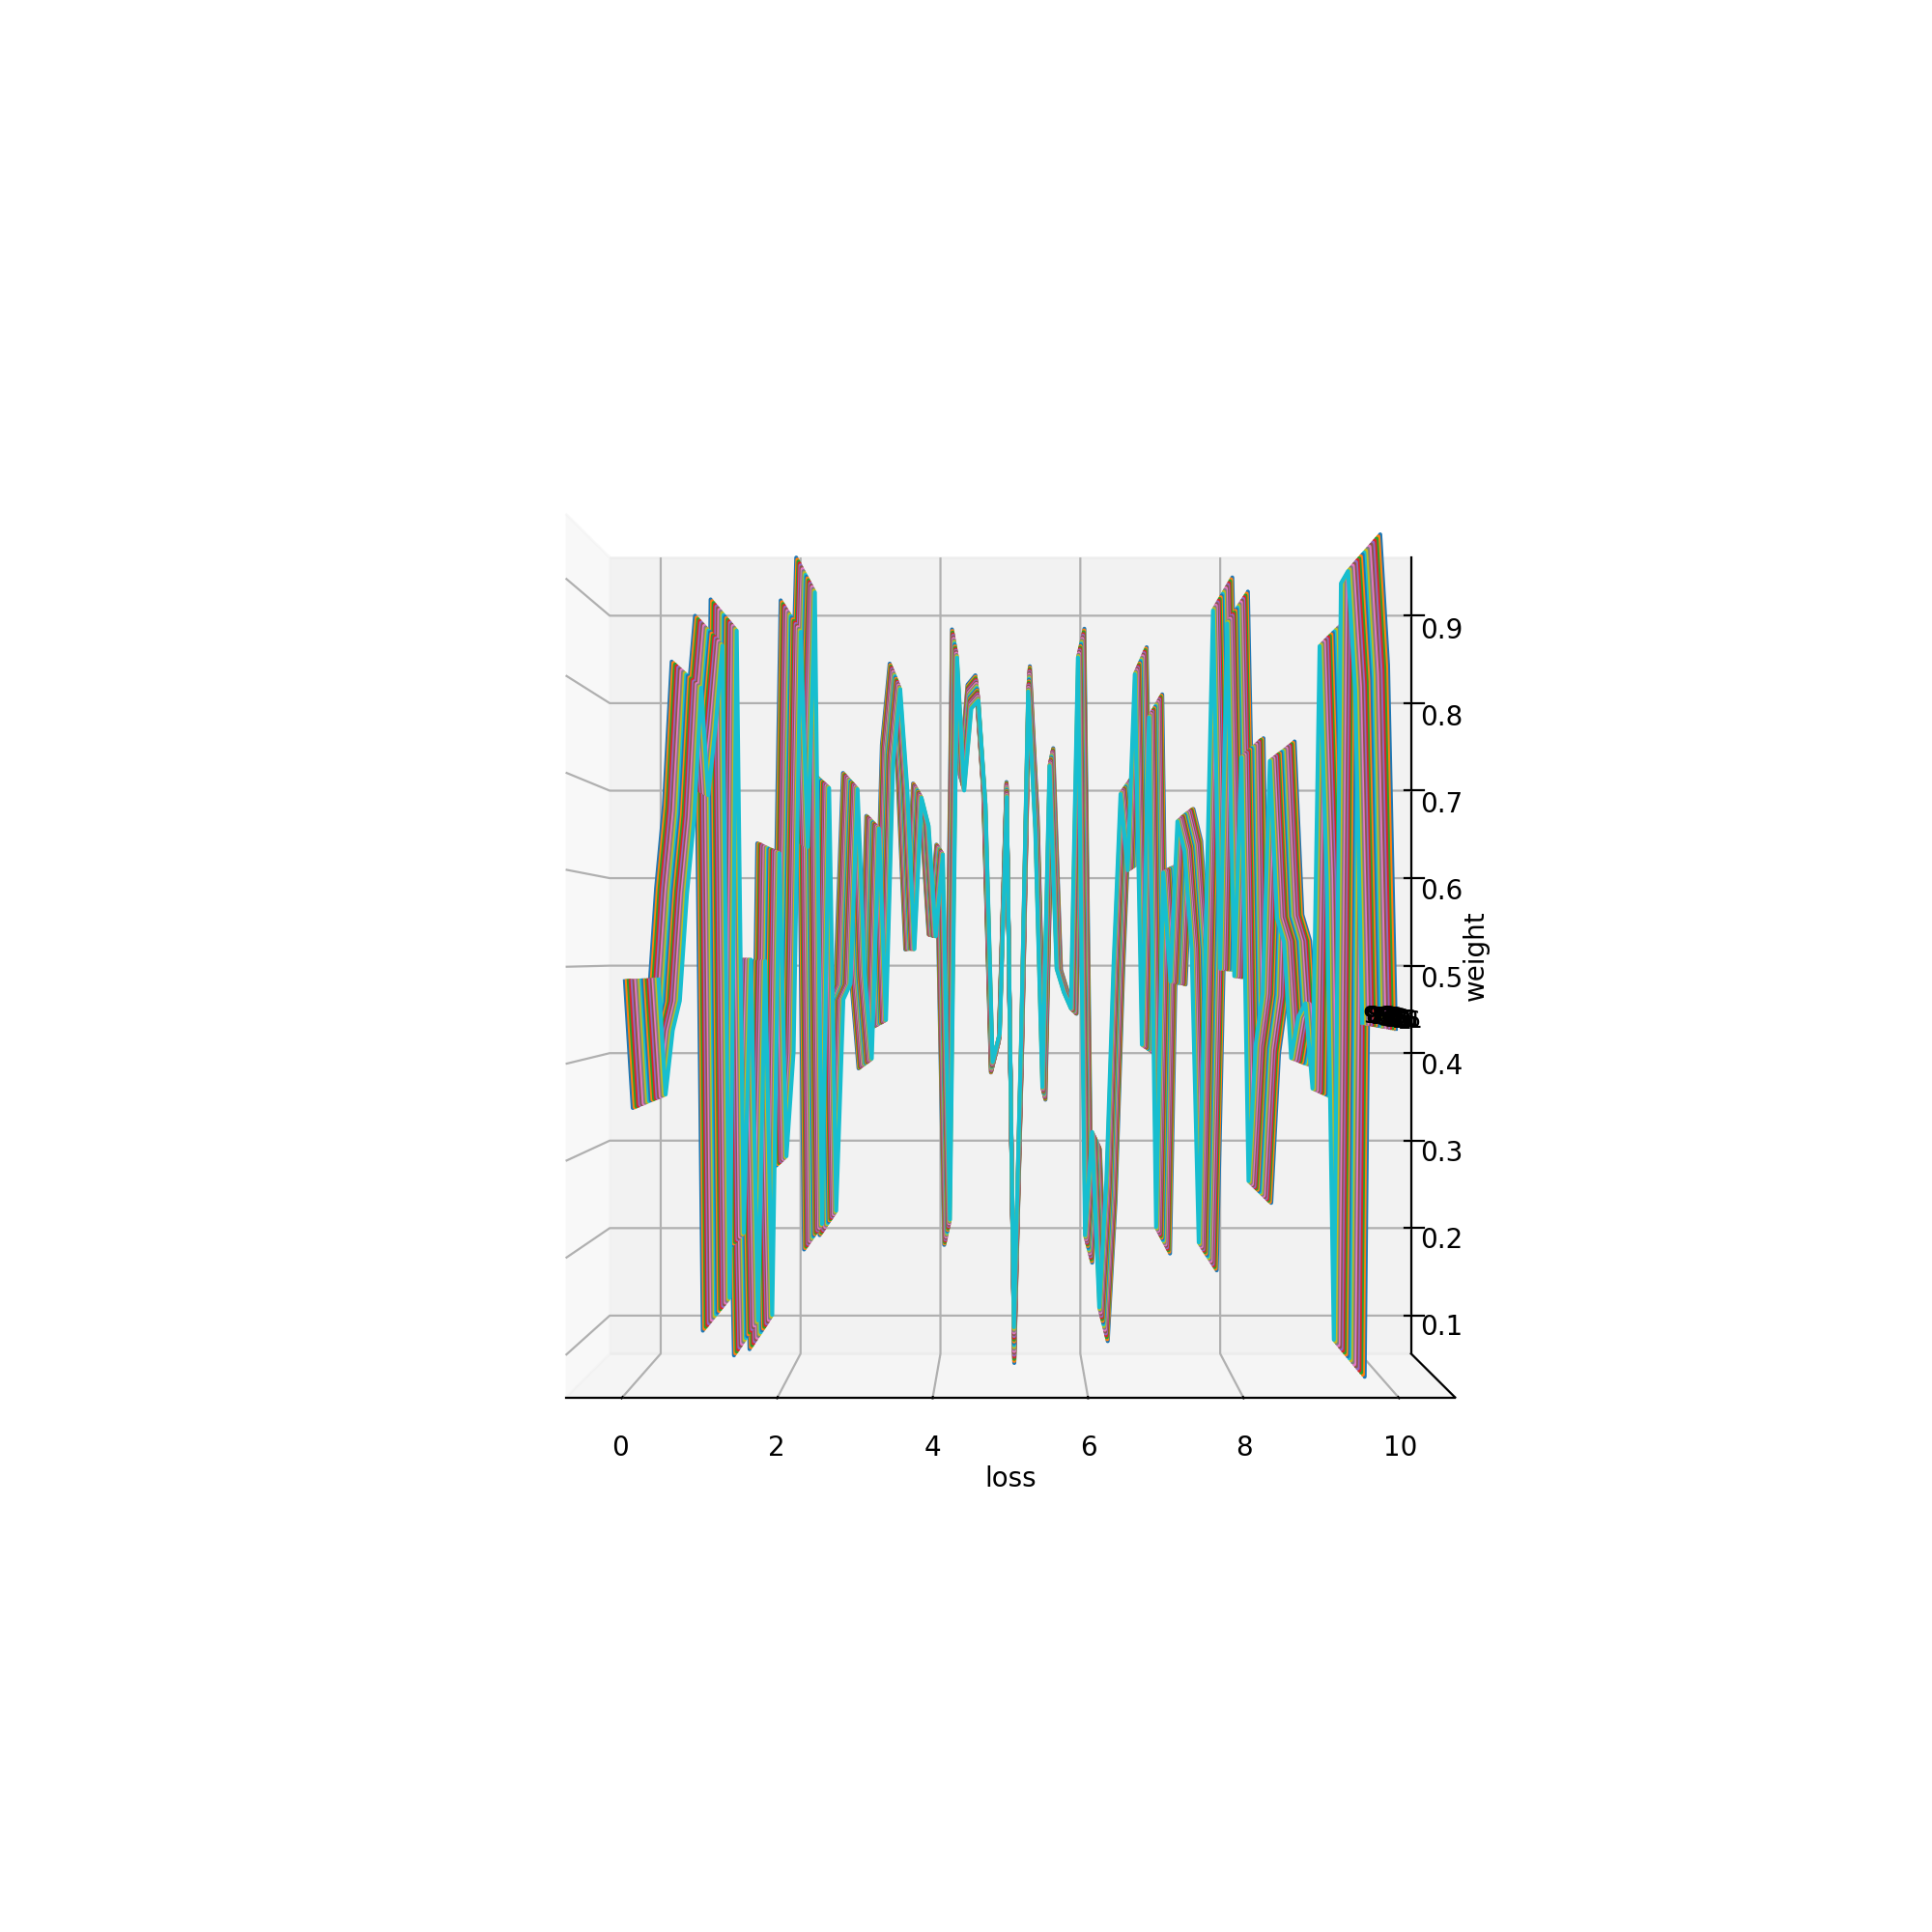

In [58]:
# vis_loss_weight_map('npy/mw_cifar10_imb100_curves_data.npy')
# vis_loss_weight_map('npy/mw_cifar100_imb10_curves_data.npy')
vis_loss_weight_map('npy/mw_v2_cifar10_imb100_curves_data.npy', step=5)
# 倾向于对 low loss 和 high loss 更多 weights?
# 当前 batch 的 loss 分布如何？